In [10]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.preprocessing import StandardScaler
from skimage import feature
from itertools import chain
from sklearn.model_selection import train_test_split
import importlib
import utils
importlib.reload(utils)
from utils import get_patches, view_sample_images
import pca_iteration
importlib.reload(pca_iteration)
from pca_iteration import run_all_models_separately, generate_final_submission

## Preparación de los datos

### Rostros

In [11]:
# Obtener rostros (positive patches)
faces = get_patches(zip_path='../../../content/Faces.zip', patches_path = '../../../content/faces_patches')

# Shape, dtype, min, max
print(f'{ faces.shape = }, {faces.dtype=}, {faces.min()=}, {faces.max()=}')

Loading images: 100%|██████████| 12833/12833 [00:01<00:00, 7390.93it/s]

 faces.shape = (12833, 64, 64), faces.dtype=dtype('uint8'), faces.min()=np.uint8(0), faces.max()=np.uint8(255)


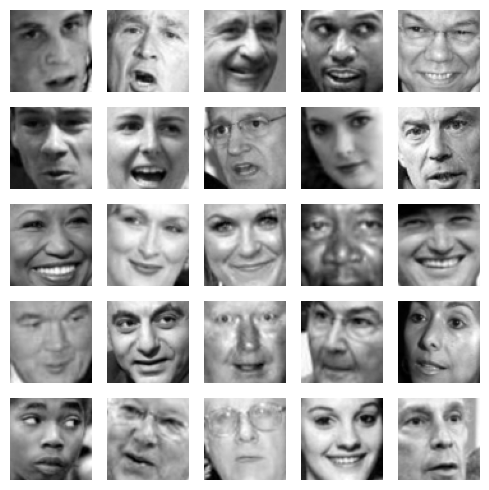

In [12]:
# Visualizamos una muestra
view_sample_images(faces, 25, figsize=(5, 5))

### Fondos

In [13]:
# Obtener fondos (negative patches)
RATIO = "x2"
SUFFIX = f'_{RATIO}_v1'  # Sufijo para los parches de fondo
backgrounds = get_patches(zip_path=f'../../../content/Backgrounds{SUFFIX}.zip', patches_path = f'../../../content/background_patches{SUFFIX}')

# Shape, dtype, min, max
print(f'{ backgrounds.shape = }, {backgrounds.dtype=}, {backgrounds.min()=}, {backgrounds.max()=}')

Loading images: 100%|██████████| 25666/25666 [00:02<00:00, 8677.00it/s]


 backgrounds.shape = (25666, 64, 64), backgrounds.dtype=dtype('uint8'), backgrounds.min()=np.uint8(0), backgrounds.max()=np.uint8(255)


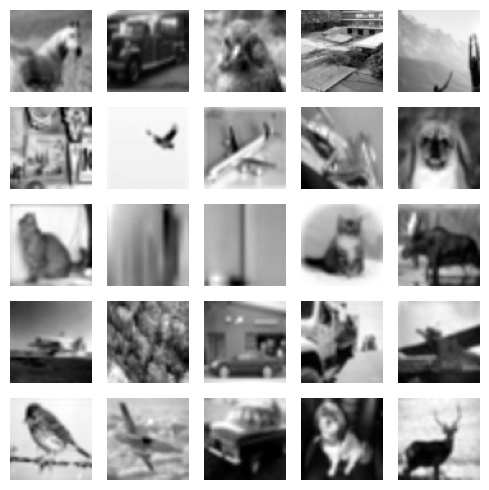

In [14]:
# Visualizamos una muestra
view_sample_images(backgrounds, 25, figsize=(5, 5))

## PCA

In [15]:
hog_params = {
    'orientations': 9,
    'pixels_per_cell': (8, 8),
    'cells_per_block': (2, 2),
    'block_norm': 'L2-Hys',
    'visualize': False,
    'transform_sqrt': True,
    'feature_vector': True,
}

X = np.array([feature.hog(im, **hog_params) for im in tqdm(chain(faces, backgrounds), desc='Construyendo X')])
y = np.zeros(len(X), dtype=int)
y[:len(faces)] = 1

Construyendo X: 38499it [00:24, 1557.83it/s]


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'{ X_train.shape = }, {X_train.dtype=}, {X_train.min()=}, {X_train.max()=}')

 X_train.shape = (30799, 1764), X_train.dtype=dtype('float64'), X_train.min()=np.float64(0.0), X_train.max()=np.float64(0.9999999987499999)


In [17]:
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

In [18]:
# PCA
n_components_list = [20]

results = run_all_models_separately(
    X_train_std=X_train_std,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    scaler=scaler,
    n_components_list=n_components_list,
    ratio=RATIO,
    version=1,
    hog_changes=True
)

Running separate grid searches for models: ['MLPClassifier']
PCA components to test: [20]


PCA Components:   0%|          | 0/1 [00:00<?, ?components/s]


PROCESSING n_components = 20
PCA with 20 components:
  Explained variance ratio: [0.07333675 0.04949852 0.03270038 0.0178623  0.01667353]...
  Cumulative variance: 0.3344



SEARCH FOR MLPClassifier
n_components: 20
Parameter combinations: 3
Performing grid search for MLPClassifier...
  Best score: 0.9906
  Best params: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.01, 'max_iter': 1000, 'solver': 'adam'}
Training MLPClassifier...


PCA Components: 100%|██████████| 1/1 [15:32<00:00, 932.69s/components]

Error with MLPClassifier: 'f1'

SUMMARY OF ALL RESULTS
No results to display


In [18]:
X = np.array([feature.hog(im) for im in tqdm(chain(faces, backgrounds), desc='Construyendo X')])
y = np.zeros(len(X), dtype=int)
y[:len(faces)] = 1

Construyendo X: 38499it [00:26, 1428.74it/s]


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'{ X_train.shape = }, {X_train.dtype=}, {X_train.min()=}, {X_train.max()=}')

 X_train.shape = (30799, 2916), X_train.dtype=dtype('float64'), X_train.min()=np.float64(0.0), X_train.max()=np.float64(0.9999999987499999)


In [20]:
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

In [ ]:
# PCA
n_components_list = [500]

results = run_all_models_separately(
    X_train_std=X_train_std,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    scaler=scaler,
    n_components_list=n_components_list,
    ratio=RATIO,
    version=1,
)

In [ ]:
hog_params = {
    'orientations': 9,
    'pixels_per_cell': (8, 8),
    'cells_per_block': (2, 2),
    'block_norm': 'L2-Hys',
    'visualize': False,
    'transform_sqrt': True,
    'feature_vector': True,
}

X = np.array([feature.hog(im, **hog_params) for im in tqdm(chain(faces, backgrounds), desc='Construyendo X')])
y = np.zeros(len(X), dtype=int)
y[:len(faces)] = 1

scaler = StandardScaler()


Construyendo X: 38499it [00:33, 1166.47it/s]


In [ ]:
generate_final_submission(X_full=X,
    y_full=y,
    scaler=scaler,
    n_components=100,
    ratio=RATIO,
    version=1,
    show=True,
    models=None,
    save_results=True,
    hog_changes=True
)
